## 任务一
使用Logistic回归，对马未能存活与疝气病的关系进行预测，导入测试集并计算分类错误率。

## 1、加载数据

In [1]:
from numpy import *

## 2、构造Sigmoid函数

In [2]:
def sigmoid(inX):
    if inX >= 0:  #对sigmoid函数的优化，避免了出现极大的数据溢出
        return 1.0 / (1 + exp(-inX))
    else:
        return exp(inX) / (1 + exp(inX))

## 3、随机梯度上升算法

In [3]:
# Logistic回归梯度上升优化算法
def stocGradAscent1(dataMatrix, classLabels, numIter=150):
    m, n = shape(dataMatrix)
    weights = ones(n)  # initialize to all ones
    for j in range(numIter):
        dataIndex = list(range(m))
        for i in range(m):
            alpha = 4 / (1.0 + j + i) + 0.0001  # apha decreases with iteration， does not
            randIndex = int(random.uniform(0, len(dataIndex)))  # go to 0 because of the constant
            h = sigmoid(sum(dataMatrix[randIndex] * weights))
            error = classLabels[randIndex] - h
            weights = weights + alpha * error * dataMatrix[randIndex]
            del (dataIndex[randIndex])
    return weights

# 这里的numIter是指迭代次数。

## 4、构造分类向量

In [4]:
def classifyVector(inX, weights):
    prob = sigmoid(sum(inX * weights))
    if prob > 0.5:
        return 1.0
    else:
        return 0.0

# 将sigmoid函数的输出值划分为两类，如果通过sigmoid函数运算之后的值大于0.5，则返回值为1，否则返回为0。这就实现了二分类。

## 5、打开测试集和训练集，并对数据进行格式化处理

In [5]:
def colicTest():
    frTrain = open('./data/horseColicTraining.txt');
    frtest = open('./data/horseColicTest.txt')
    trainingSet = [];
    trainingLabels = []
    for line in frTrain.readlines():
        currLine = line.strip().split('\t')
        lineArr = []
        for i in range(21):
            lineArr.append(float(currLine[i]))
        trainingSet.append(lineArr)
        trainingLabels.append(float(currLine[21]))

    trainWeights = stocGradAscent1(array(trainingSet), trainingLabels, 1000)
    errorCount = 0
    numTestVec = 0.0

    for line in frtest.readlines():
        numTestVec += 1.0
        currLine = line.strip().split('\t')
        lineArr = []
        for i in range(21):
            lineArr.append(float(currLine[i]))
        if int(classifyVector(array(lineArr), trainWeights)) != int(currLine[21]):
            errorCount += 1

    errorRate = (float(errorCount) / numTestVec)
    print(f"the error rate of this test is: {errorRate}")
    return errorRate

使用open（），导入数据集。使用stocGradAscent1()方法实现梯度上升算法，对训练集进行训练，从而得到模型。再用测试集，通过分类方法classifyVector()对测试集上的数据进行分类，从而计算出错误率。

## 6、调用验证方法

In [6]:
def multiTest():
    numTests = 10
    errorSum = 0.0
    for k in range(numTests):
        errorSum += colicTest()
    print(f"after {numTests} iterations the average error rate is: {errorSum / float(numTests)}")


## 7、主程序

In [7]:
# 这里我们重复评估10次错误率，取平均值。
multiTest()

the error rate of this test is: 0.3880597014925373
the error rate of this test is: 0.3582089552238806
the error rate of this test is: 0.3283582089552239
the error rate of this test is: 0.26865671641791045
the error rate of this test is: 0.2835820895522388
the error rate of this test is: 0.31343283582089554
the error rate of this test is: 0.31343283582089554
the error rate of this test is: 0.31343283582089554
the error rate of this test is: 0.34328358208955223
the error rate of this test is: 0.31343283582089554
after 10 iterations the average error rate is: 0.3223880597014926


## 任务二
使用sklearn里的乳腺癌数据集load_breast_cancer分析LogisticRegression。

## 1、导入所需库 

In [8]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer

## 2、训练数据集并进行测试

In [9]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression(solver='liblinear').fit(X_train, y_train)
print("Training set score:{:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score:{:.3f}".format(logreg.score(X_test, y_test)))

# C=1 的默认值给出了相当好的性能，在训练集和测试集上都达到 95%的精度。但由于训练集和测试集的性能非常接近，所以模型很可能是欠拟合的。

Training set score:0.953
Test set score:0.958


## 3、比较不同正则化强度对结果的影响

In [10]:
# C==100
logreg100 = LogisticRegression(C=100, solver='liblinear').fit(X_train, y_train)
print("Training set score:{:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score:{:.3f}".format(logreg100.score(X_test, y_test)))

# 使用 C=100,可以得到更高的训练集精度，也得到了稍高的测试集精度，这也证实了我们的直觉，即更复杂的模型应该性能更好。

Training set score:0.974
Test set score:0.965


In [11]:
# 我们还可以研究使用正则化更强的模型时会发生什么。设置 C=0.01：
# C=0.01
logreg001 = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)
print("Training set score:{:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score:{:.3f}".format(logreg001.score(X_test, y_test)))

Training set score:0.934
Test set score:0.930


## 4、可视化比较正则化参数 C 取三个不同的值时模型学到的系数

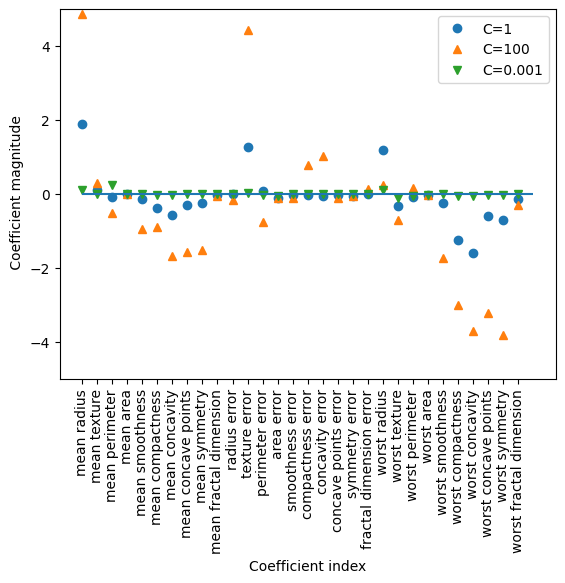

In [12]:
# 最后，来看一下正则化参数 C 取三个不同的值时模型学到的系数。
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel(" Coefficient magnitude")
plt.legend()
